# Assignment 1

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Solve household problem](#toc2_)    
- 3. [Find stationary equilibrium](#toc3_)    
  - 3.1. [Direct approach](#toc3_1_)    
  - 3.2. [Looking at the stationary equilibrium](#toc3_2_)    
    - 3.2.1. [Policy functions](#toc3_2_1_)    
    <!-- - 3.2.2. [Distributions](#toc3_2_2_)     -->
  <!-- - 3.3. [Indirect approach](#toc3_3_)     -->
- 4. [Calculating the Jacobians](#toc4_)
	- 4.1 [The Jacobians](#toc4_1_)
- 5. [Finding transitionpath](#toc5_)
	- 5.1 [Temporary shock to $\varphi_1$](#toc5_1)
	- 5.2 [Permanent shock to $\varphi_2$](#toc5_2)
<!-- - 6. [Extra: Demand vs. supply of capital](#toc6_)     -->

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [22]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCModel import HANCModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [23]:
model = HANCModelClass(name='baseline') # create an instance of the model

In [24]:
par = model.par
ss = model.ss

## 2. <a id='toc2_'></a>[Solve household problem](#toc0_)

Set the steady state values, which matter for the household:

In [25]:
ss.r = 0.01
ss.w = 1.00
ss.phi0 = 1.0
ss.phi1 = 2.0

**Solve the household problem** with `.solve_hh_ss()`:
    
1. Calls `.prepare_hh_ss()`
1. Calls `.solve_backwards_hh()` until convergence

In [26]:
# Solving household problem with different values for beta and eta
model.solve_hh_ss(do_print=True)

household problem in ss solved in 0.1 secs [52 iterations]


In [27]:
model.simulate_hh_ss(do_print=True)

household problem in ss simulated in 0.0 secs [2 iterations]


## 3. <a id='toc3_'></a>[Find stationary equilibrium](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Direct approach](#toc0_)

In [28]:
model.find_ss(method='direct',do_print=True)

### step 1: broad search ###

guess ss.K = 1.0000
implied ss.r = 0.2600
implied ss.w = 0.6400
household problem in ss solved in 0.4 secs [353 iterations]
household problem in ss simulated in 0.0 secs [108 iterations]
implied ss.A_hh = 340.6580
clearing_A = -339.65804168

guess ss.K = 2.0000
implied ss.r = 0.1310
implied ss.w = 0.8214
household problem in ss solved in 1.3 secs [1148 iterations]
household problem in ss simulated in 0.3 secs [2791 iterations]
implied ss.A_hh = 277.5090
clearing_A = -275.50900094

guess ss.K = 3.0000
implied ss.r = 0.0782
implied ss.w = 0.9505
household problem in ss solved in 0.3 secs [249 iterations]
household problem in ss simulated in 0.0 secs [181 iterations]
implied ss.A_hh = 0.1255
clearing_A =   2.87451171

guess ss.K = 4.0000
implied ss.r = 0.0482
implied ss.w = 1.0542
household problem in ss solved in 0.2 secs [136 iterations]
household problem in ss simulated in 0.0 secs [84 iterations]
implied ss.A_hh = 0.0046
clearing_A =   3.99537167

guess s

**Look at the steady state variables:**

In [29]:
for varname in model.varlist:
    print(f'{varname:15s}: {ss.__dict__[varname]:.4f}')

Gamma          : 1.0000
K              : 2.3819
L0             : 0.6667
L1             : 0.3333
rK             : 0.2066
w              : 0.8747
Y              : 0.8446
A              : 2.3819
r              : 0.1066
phi0           : 1.0000
phi1           : 2.0000
A_hh           : 2.3819
C_hh           : 1.1820
L0_hh          : 0.6667
L1_hh          : 0.6667
I              : 0.2382
clearing_A     : 0.0000
clearing_L0    : 0.0000
clearing_L1    : -0.3333
clearing_Y     : -0.5755


production_firm: [K,L0,L1] -> [Gamma,rK,w,Y]
mutual_fund: [K,rK] -> [A,r]
hh: [phi1,r,w] -> [phi0,A_hh,C_hh,L0_hh,L1_hh]
market_clearing: [A,A_hh,L0,L1,L0_hh,L1_hh,Y,C_hh,K] -> [I,clearing_A,clearing_L0,clearing_L1,clearing_Y]


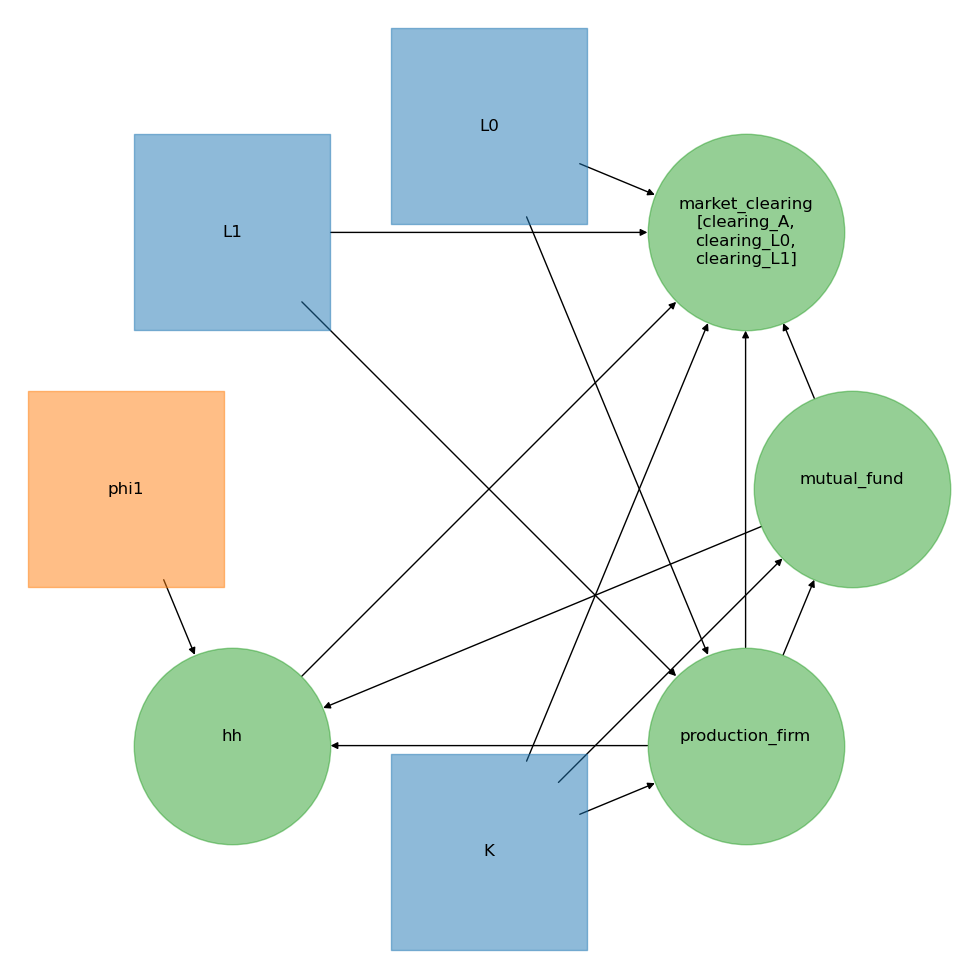

In [30]:
model.info(only_blocks=True)
model.draw_DAG(figsize=(10,10))

### 3.2. <a id='toc3_2_'></a>[Looking at the stationary equilibrium](#toc0_)

#### 3.2.1. <a id='toc3_2_1_'></a>[Policy functions](#toc0_)

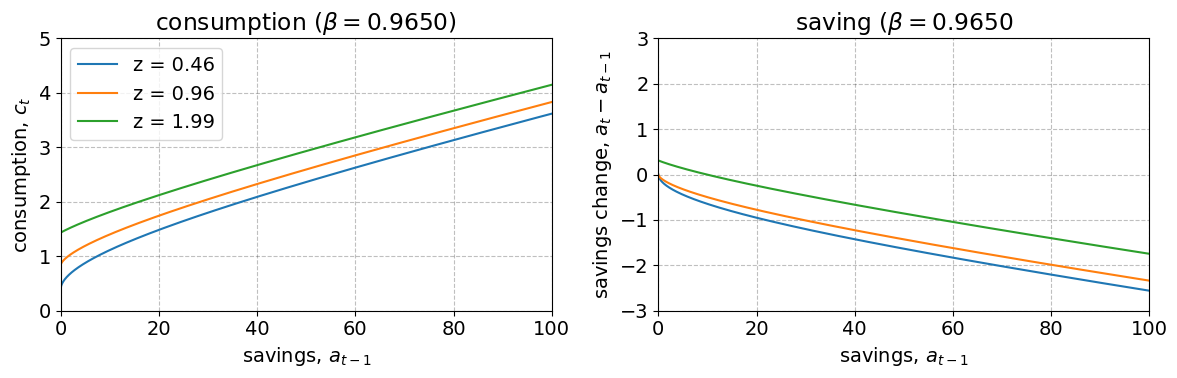

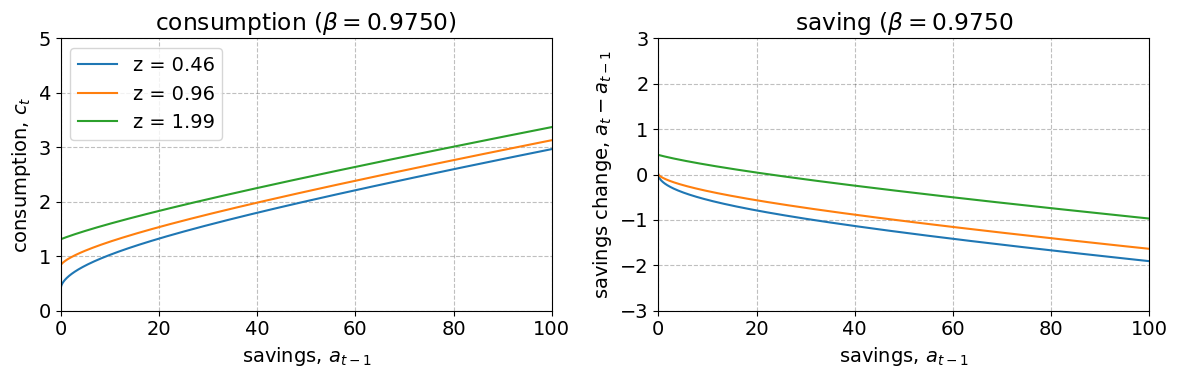

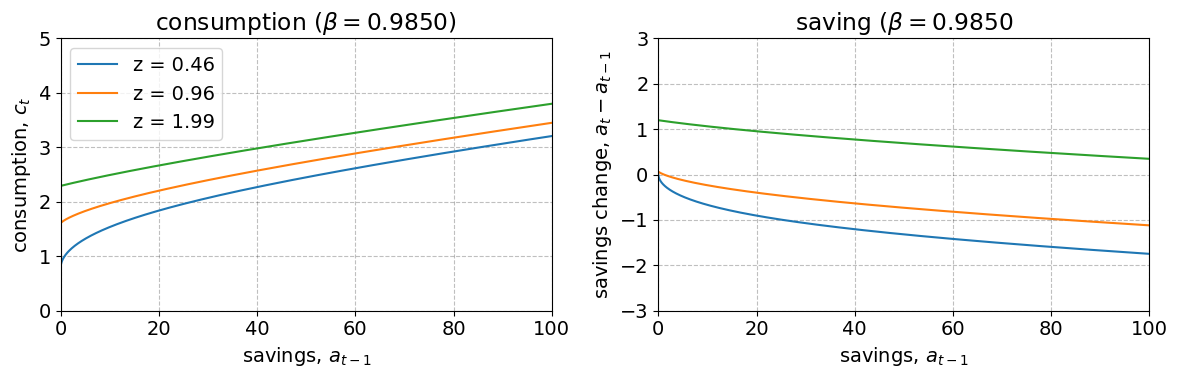

In [31]:
# Loop over beta values
for i_beta, beta in enumerate(par.beta_grid):

    fig = plt.figure(figsize=(12,4),dpi=100)
    I = par.a_grid < 500
    
    # a. consumption
    ax = fig.add_subplot(1,2,1)
    ax.set_title(f'consumption ($\\beta = {beta:.4f}$)')

    for i_z, z in enumerate(par.z_grid):
        if i_z % 3 == 0 or i_z == par.Nz-1:
            ax.plot(par.a_grid[I], ss.c[i_beta, i_z, I], label=f'z = {z:.2f}')
            
    ax.legend(frameon=True)
    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('consumption, $c_t$')
    ax.set_xlim(0,100)
    ax.set_ylim(0,5)

    # b. saving
    ax = fig.add_subplot(1,2,2)
    ax.set_title(f'saving ($\\beta = {beta:.4f}$')

    for i_z, z in enumerate(par.z_grid):
        if i_z % 3 == 0 or i_z == par.Nz-1:
            ax.plot(par.a_grid[I], ss.a[i_beta, i_z, I] - par.a_grid[I], label=f'z = {z:.2f}')

    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('savings change, $a_{t}-a_{t-1}$')
    ax.set_xlim(0,100)
    ax.set_ylim(-3,3)

    fig.tight_layout()
    # fig.savefig(f'figs/c_func_{i_beta}_{eta}.pdf')

## 4. <a id='toc3_2_'></a>[Calculating the Jacobians](#toc0_)

In [32]:
model.compute_jacs(do_print=True) # if skip_shocks = True the full Jacobians to shocks are  not computed

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for phi0            in 0.8 secs
curly_Y and curly_D calculated for phi1            in 0.8 secs
curly_Y and curly_D calculated for r               in 0.8 secs
curly_Y and curly_D calculated for w               in 0.7 secs
curly_E calculated in 0.2 secs
builiding blocks combined in 0.3 secs
household Jacobian computed in 3.7 secs

full Jacobians:
full Jacobian to unknowns computed in 0.8 secs [in evaluate_blocks(): 0.3 secs]
full Jacobian to shocks computed in 0.3 secs [in evaluate_blocks(): 0.1 secs]


### 4.1. <a id='toc3_2_'></a>[The Jacobians](#toc0_)

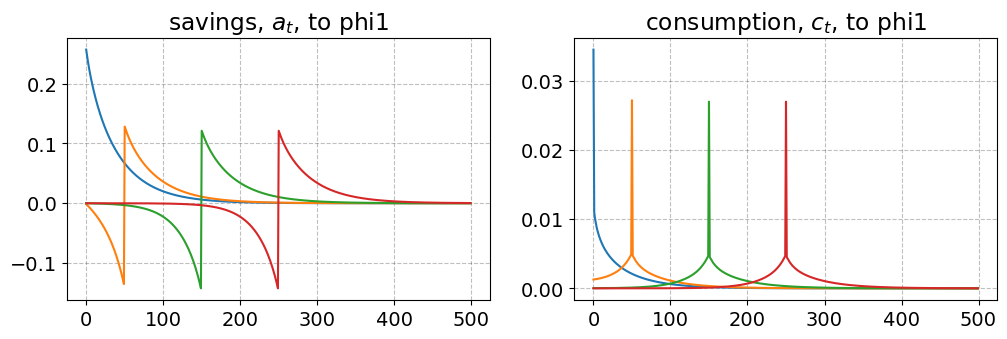

In [33]:
fig = plt.figure(figsize=(12,len(model.inputs_hh_all)*4),dpi=100)

i = 0
for varname in model.inputs_hh[3:4]:
    
    # a. savings
    i += 1    
    ax = fig.add_subplot(len(model.inputs_hh_all),2,i)
    ax.set_title(f'savings, $a_t$, to {varname}')
    for s in [0,50,150,250]:
        jac_hh_var = model.jac_hh[('A_hh',varname)]
        ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')
    
        # ax.legend(frameon=True,bbox_to_anchor=(0.0,0.0))

    # b. consumption
    i += 1    
    ax = fig.add_subplot(len(model.inputs_hh_all),2,i)
    ax.set_title(f'consumption, $c_t$, to {varname}')
    for s in [0,50,150,250]:
        jac_hh_var = model.jac_hh[('C_hh',varname)]
        ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')

## 5. <a id='toc3_2_'></a>[Finding transitionpath](#toc0_)
### 5.1 <a id='toc3_2_'></a>[Temporary shock to $\varphi_1$](#toc0_)

c:\Users\TheNixe\Documents\KU\HANK\AdvMacroHet\Assignments\Assignment_I\household_problem.py:37: RuntimeWarning: divide by zero encountered in power
  v_a = (1+r-par.delta)*c[i_fix]**(-par.sigma)
c:\Users\TheNixe\Documents\KU\HANK\AdvMacroHet\Assignments\Assignment_I\blocks.py:34: RuntimeWarning: invalid value encountered in power
  rK[:] = par.alpha*Gamma*(K_lag/(L0 + L1))**(par.alpha-1.0)
c:\Users\TheNixe\Documents\KU\HANK\AdvMacroHet\Assignments\Assignment_I\blocks.py:37: RuntimeWarning: invalid value encountered in power
  w[:] = (1.0-par.alpha)*Gamma*(K_lag/(L0 + L1))**par.alpha
c:\Users\TheNixe\Documents\KU\HANK\AdvMacroHet\Assignments\Assignment_I\blocks.py:43: RuntimeWarning: invalid value encountered in power
  Y[:] = Gamma*K_lag**par.alpha*((L0*ss.phi0 + L1*ss.phi1)**(1.0-par.alpha))


Gamma: terminal value is   0.00000000, but ss value is   1.00000000
K: terminal value is   0.00000000, but ss value is   2.38188586
L0: terminal value is   0.00000000, but ss value is   0.66666667
L1: terminal value is   0.66666667, but ss value is   0.33333333
rK: terminal value is   0.00000000, but ss value is   0.20657278
w: terminal value is   0.00000000, but ss value is   0.87472495
Y: terminal value is   0.00000000, but ss value is   0.84462423
A: terminal value is   0.00000000, but ss value is   2.38188586
r: terminal value is  -0.10000000, but ss value is   0.10657278
phi0: terminal value is   0.00000000, but ss value is   1.00000000
A_hh: terminal value is   0.00000000, but ss value is   2.38188586
C_hh: terminal value is   0.00000000, but ss value is   1.18195555
L0_hh: terminal value is   0.00000000, but ss value is   0.66666667
I: terminal value is   0.00000000, but ss value is   0.23818859
clearing_L1: terminal value is  -0.00000000, but ss value is  -0.33333333
clearing_Y

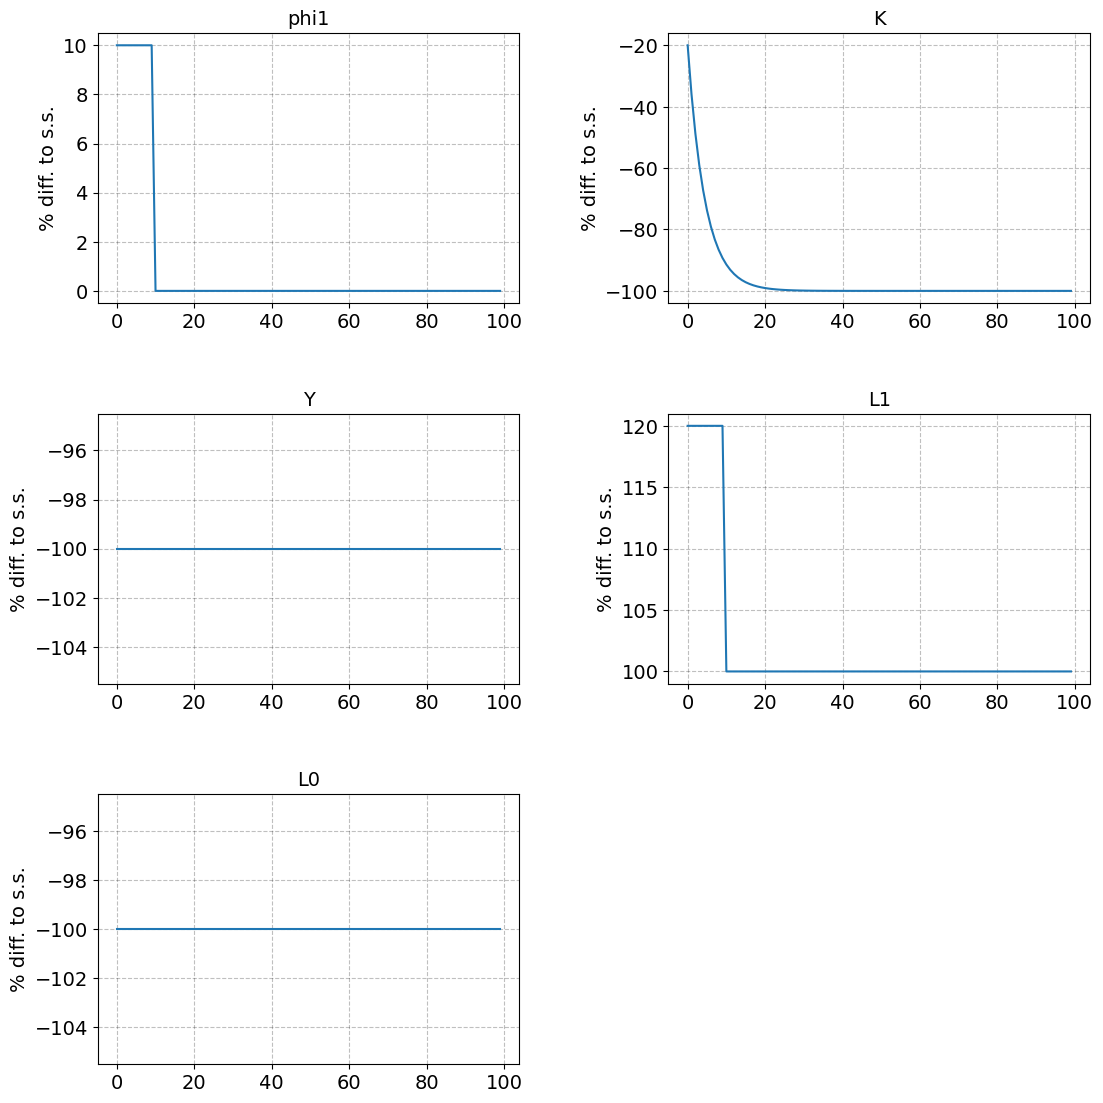

In [36]:
# a. define shock
dphi1 = np.zeros(par.T)
dphi1[0:10] = 0.1*ss.phi1
shocks = {'dphi1':dphi1} # note the 'd' for difference (in absolute terms)

# b. find transition path
model.find_transition_path(do_print=False,shocks=shocks)

model.show_IRFs(['phi1','K','Y','L1','L0'],T_max=100,do_shocks=False,do_targets=False,ncols=2,filename='figs/10_period_phi1_shock')

### 5.2 <a id='toc3_2_'></a>[Permanent shock to $\varphi_1$](#toc0_)

c:\Users\TheNixe\Documents\KU\HANK\AdvMacroHet\Assignments\Assignment_I\household_problem.py:37: RuntimeWarning: divide by zero encountered in power
  v_a = (1+r-par.delta)*c[i_fix]**(-par.sigma)
c:\Users\TheNixe\Documents\KU\HANK\AdvMacroHet\Assignments\Assignment_I\blocks.py:34: RuntimeWarning: invalid value encountered in power
  rK[:] = par.alpha*Gamma*(K_lag/(L0 + L1))**(par.alpha-1.0)
c:\Users\TheNixe\Documents\KU\HANK\AdvMacroHet\Assignments\Assignment_I\blocks.py:37: RuntimeWarning: invalid value encountered in power
  w[:] = (1.0-par.alpha)*Gamma*(K_lag/(L0 + L1))**par.alpha
c:\Users\TheNixe\Documents\KU\HANK\AdvMacroHet\Assignments\Assignment_I\blocks.py:43: RuntimeWarning: invalid value encountered in power
  Y[:] = Gamma*K_lag**par.alpha*((L0*ss.phi0 + L1*ss.phi1)**(1.0-par.alpha))
c:\Users\TheNixe\Documents\KU\HANK\AdvMacroHet\Assignments\Assignment_I\blocks.py:34: RuntimeWarning: divide by zero encountered in power
  rK[:] = par.alpha*Gamma*(K_lag/(L0 + L1))**(par.alpha-1

Gamma: terminal value is   0.00000000, but ss value is   1.00000000
K: terminal value is   0.00000000, but ss value is   2.38188586
L0: terminal value is   0.00000000, but ss value is   0.66666667
L1: terminal value is   0.66666667, but ss value is   0.33333333
rK: terminal value is   0.00000000, but ss value is   0.20657278
w: terminal value is   0.00000000, but ss value is   0.87472495
Y: terminal value is   0.00000000, but ss value is   0.84462423
A: terminal value is   0.00000000, but ss value is   2.38188586
r: terminal value is  -0.10000000, but ss value is   0.10657278
phi0: terminal value is   0.00000000, but ss value is   1.00000000
A_hh: terminal value is   0.00000000, but ss value is   2.38188586
C_hh: terminal value is   0.00000000, but ss value is   1.18195555
L0_hh: terminal value is   0.00000000, but ss value is   0.66666667
I: terminal value is   0.00000000, but ss value is   0.23818859
clearing_L1: terminal value is  -0.00000000, but ss value is  -0.33333333
clearing_Y

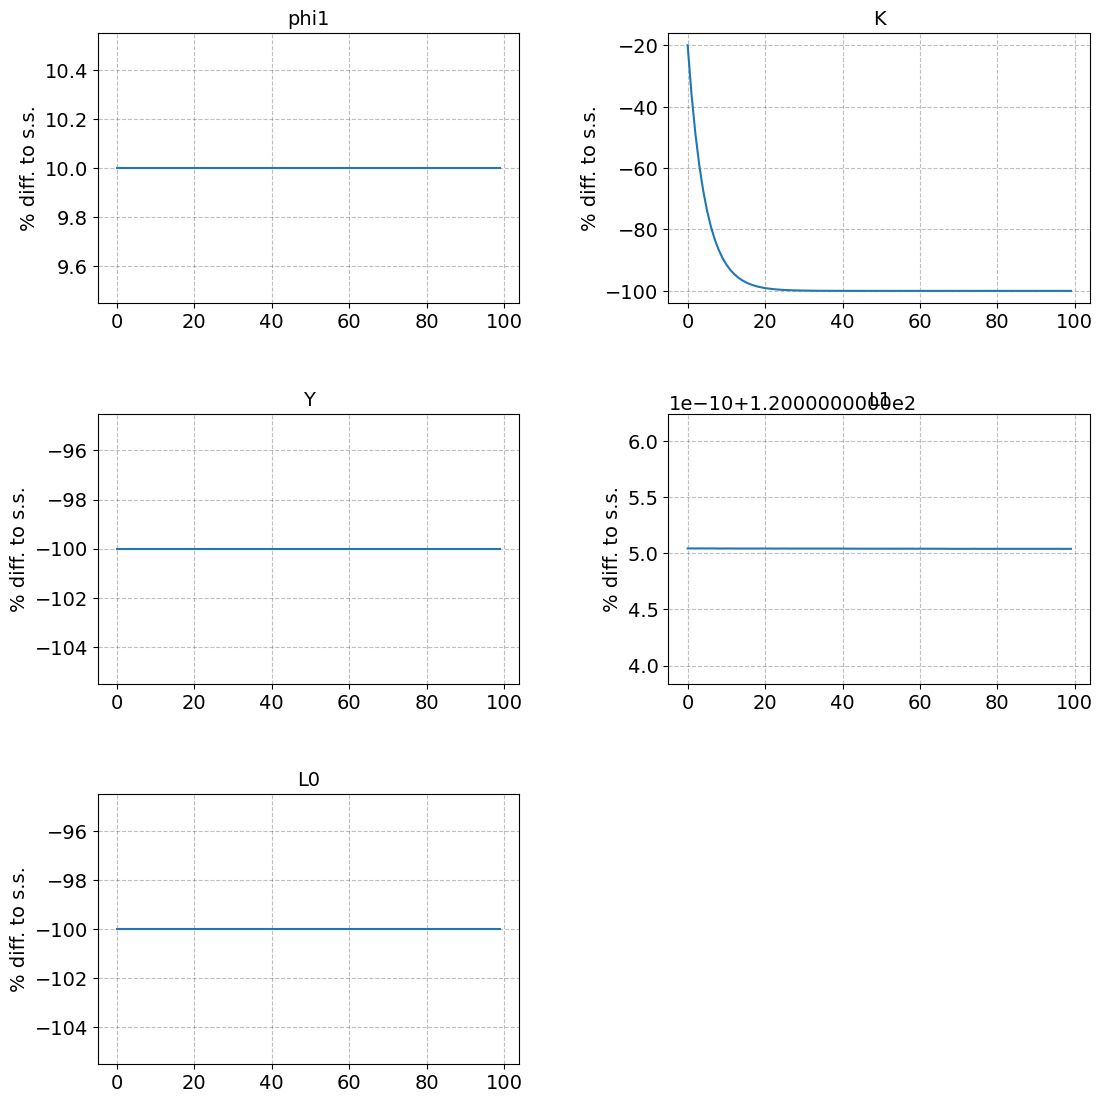

In [35]:
# a. define shock
dphi1 = np.zeros(par.T)
dphi1[:] = 0.1*ss.phi1
shocks = {'dphi1':dphi1} # note the 'd' for difference (in absolute terms)

# b. find transition path
model.find_transition_path(do_print=False,shocks=shocks)

model.show_IRFs(['phi1','K','Y','L1','L0'],T_max=100,do_shocks=False,do_targets=False,ncols=2,filename='figs/phi1_shock')